## L'architecture du Réseau de Neurone Récurrent

On a donné dans le notebook précédent une idée sur l'architecture du Réseau de Neurone Récurrent. Mais approfondissons maintenant ce qui se passe et comment il est construit.

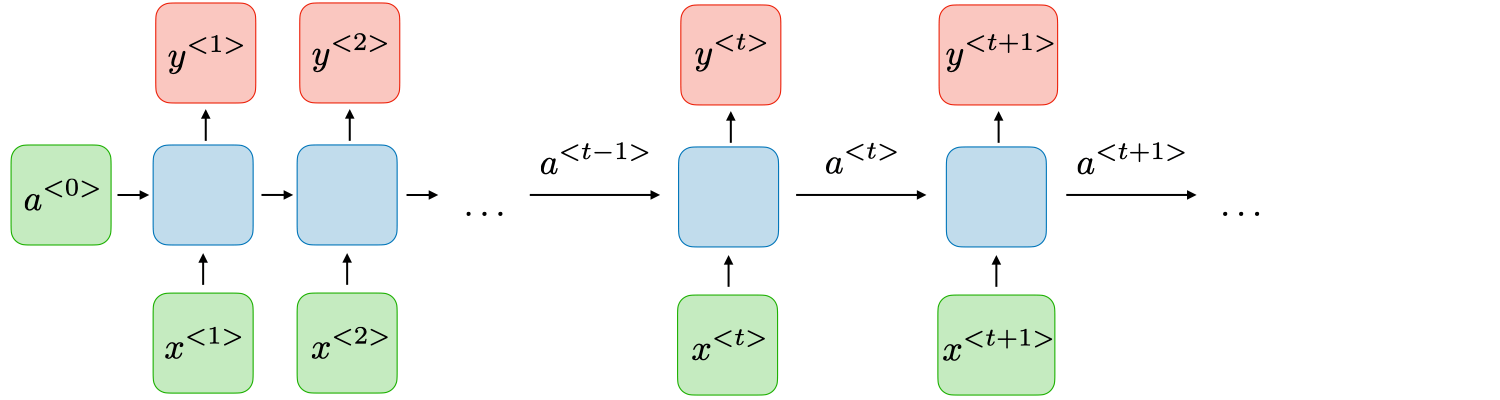

In [2]:
from IPython.display import Image
image_path = "architecture rnn.png"
width = 700
height = 700
Image(filename=image_path, width=width, height=height)

Pour chaque pas de temps, la fonction d'activation $a_t$ et la sortie $y_t$ sont exprimées comme suit :

$a_t$ = $g_1$($W_{aa}$*$a_{t-1}$ + $W_{ax}$*$x_{t}$ + $b_a$)

et

$y_t$ = $g_2$($W_{ya}$*$a_t$ + $b_y$)
 
avec $W_i$ et $b_i$ sont les poids et les biais et $g_1$ et $g_2$ les fonctions d'activations.

La fonction d'activation sera le plus souvent une fonction Tanh. Parfois, pour les RNN, ReLu peut également être utilisé, mais Tanh est l'option préférée pour résoudre le problème du gradient qui disparaît qui sera détaillée dans la suite. Le choix d'une fonction d'activation est également une étape importante. Si la sortie est une classification binaire, nous utiliserons une fonction d'activation Sigmoid. Sinon, si la sortie est un problème de classification à K classes, nous opterons pour Softmax.

Le premier input de la première couche du réseau neuronal ci-dessus est $x_1$. Cet input traverse une couche cachée et $y_1$ est sa prédiction en sortie. Le rôle du réseau neuronal récurrent intervient lorsque le deuxième input, $x_2$, est lu. Au lieu de simplement prédire $y_2$ en utilisant $x_2$, il reçoit également un deuxième input sous forme de valeur d'activation à partir de l'Étape 1. Le même processus est répété pour les étapes temporelles suivantes, jusqu'à la dernière étape temporelle. Pour l'étape temporelle initiale 1, la valeur d'activation est maintenue à 0, ce qui correspond à un vecteur de zéros avec une étape de temps fictive 0. Certains chercheurs adoptent d'autres méthodes pour initialiser la valeur d'activation, $a_0$, de manière aléatoire, mais avoir un vecteur de zéros est la pratique la plus courante.

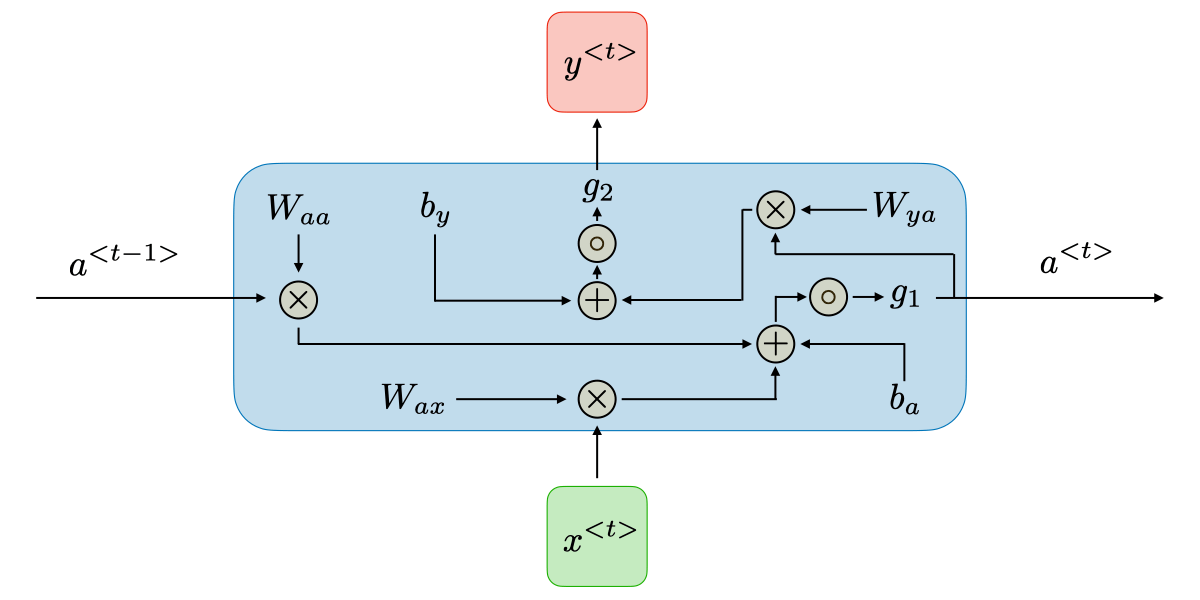

In [5]:
from IPython.display import Image
image_path = "description rnn.png"
width = 600
height = 600
Image(filename=image_path, width=width, height=height)

Le RNN lit les données d'entrée de gauche à droite tout en partageant les paramètres à chaque étape temporelle. Regardons les paramètres qui régissent la connexion entre $x_1$ et la couche cachée. Ce paramètre, identique pour chaque étape temporelle, peut être désigné par $W_{ax}$. De même, le paramètre commun qui régit les prédictions de sortie est désigné par $W_{ya}$.

## Limitation: Réseaux Neuronaux Récurrents Unidirectionnels

Considérons le paramètre de sortie $y_3$. Cette sortie ou cette prédiction n'est pas seulement basée sur l'entrée de cet instant 
$x_3$, mais aussi sur les informations reçues des entrées précédentes $x_2$ et $x_1$, qui sont transmises avec les valeurs d'activation et les paramètres qui les régissent.
On remarque comment il n'utilise que les informations précédentes et ne prend pas en compte les informations des mots à venir dans la séquence, telles que $x_4$, $x_5$, et ainsi de suite.
Cette limitation découle de l'utilisation de l'architecture de réseau neuronal unidirectionnel et ne peut être résolue qu'en utilisant des Réseaux Neuronaux Récurrents Bidirectionnels (BRNN), qui modifient légèrement l'architecture pour incorporer les informations de tous les mots d'entrée de la phrase à chaque pas de temps. On apprendra davantage sur les BRNN dans les publications futures. Pour des raisons de simplicité et de compréhension des concepts clés, on travaillera uniquement avec des Réseaux Neuronaux Récurrents Unidirectionnels pour le moment.

## Back propagation through time (BPTT)

La rétropropagation du gradient est utilisée pour calculer le gradient d'une fonction d'erreur par rapport aux poids d'un réseau neuronal. Le gradient mesure à quel point la sortie d'une fonction change si on modifie un peu les entrées. L'algorithme parcourt les différentes couches de gradients pour trouver la dérivée partielle des erreurs par rapport aux poids. Ensuite, la rétropropagation utilise ces poids pour réduire les marges d'erreur lors de l'entraînement.

Dans les réseaux neuronaux, vous effectuez essentiellement une propagation avant pour obtenir la sortie de votre modèle et vérifier si cette sortie est correcte ou incorrecte, afin d'obtenir l'erreur. La rétropropagation consiste simplement à remonter à travers votre réseau neuronal pour trouver les dérivées partielles de l'erreur par rapport aux poids, ce qui vous permet de soustraire cette valeur aux poids.

Ces dérivées sont ensuite utilisées par la descente de gradient, un algorithme qui peut minimiser de manière itérative une fonction donnée. Ensuite, il ajuste les poids vers le haut ou vers le bas, en fonction de ce qui diminue l'erreur. C'est exactement ainsi qu'un réseau neuronal apprend pendant le processus d'entraînement.

Ainsi, avec la rétropropagation, on ajuste les poids du modèle pendant l'entraînement.


Le Backpropagation Through Time (BPTT) est utilisée pour entraîner les réseaux de neurones récurrents (RNN) en mettant à jour les poids et les biais. Mais étant donné dans ce cas que les poids sont les mêmes pour tous les pas de temps pour calculer $y_t$, on doit remonter tout le chemin pour effectuer une mise à jour, ce qui cause soit un problème de disparition soit un problème d'explosion du gradient. Cela signifie que le réseau montre des difficultés à mémoriser les mots éloignés dans la séquence et fait des prédictions basées uniquement sur les plus récents.

Plus le gradient est élevé, plus le modèle peut apprendre rapidement. Mais si le gradient est nulle, le modèle cesse d'apprendre. Un gradient mesure simplement le changement de tous les poids par rapport au changement d'erreur.

**Exploding Gradients:**
Les gradients explosifs se produisent lorsque l'algorithme, sans raison valable, attribue une importance stupéfiante aux poids.  

**Vanishing Gradients:**
Les gradients qui disparaissent se produisent lorsque les valeurs d'un gradient sont trop petites et que le modèle cesse d'apprendre ou met beaucoup trop de temps en conséquence. C'était un problème majeur dans les années 1990 et beaucoup plus difficile à résoudre que les gradients explosifs. Les gradients portent des informations utilisées dans le RNN, et lorsque le gradient devient trop petit, les mises à jour des paramètres deviennent insignifiantes. Cela rend l'apprentissage de longues séquences de données difficile.


Heureusement, le problème de gradient a été résolu grâce au concept de LSTM (Long Short-Term Memory) par Sepp Hochreiter et Juergen Schmidhuber qui sera traiter dans un notebook qui suit.